# Gradient Boosting


**Gradient Boosting** is a supervised learning algorithm that combines multiple weak models to create a strong predictive model. It is particularly useful for regression and classification problems.

**Key Concepts:**

- **Ensemble Learning**: Combining multiple models to improve the accuracy and robustness of predictions.
- **Weak Learners**: Models that are slightly better than random guessing, but not necessarily good.
- **Gradient Descent**: An optimization algorithm used to minimize the loss function and find the optimal parameters for the model.

**How it Works:**

1. Initialize the model with a set of weak learners.
2. Compute the loss function for each weak learner.
3. Compute the gradient of the loss function with respect to each weak learner.
4. Update the model parameters using gradient descent.
5. Repeat steps 2-4 until convergence or a specified number of iterations.

**Advantages:**

- **Interpretable Models**: The model is composed of a set of weak learners, which can be easily interpreted.
- **Flexibility**: The algorithm can be used with different types of weak learners and loss functions.
- **Robustness**: The model is robust to outliers and noisy data.

**Common Applications:**

- Regression problems
- Classification problems
- Time series forecasting
- Recommendation systems


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250903173429506712/des.webp"/>

## Gradient Boosting Classifier Example

**dataset from kaggle**: https://www.kaggle.com/datasets/brendan45774/test-file

**We will use popular titanic dataset**

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data with pandas
df = pd.read_csv('2_8_titanic_dataset.csv')
df.head(10)

Sex
female    152
Name: count, dtype: int64


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Titanic dataset is a dataset of passengers who survived the sinking of the Titanic ship in 1912.**

A brief overview of the columns:

* PassengerId: Unique identifier for each passenger.
* Survived (target): Survival status (0 = No, 1 = Yes). This is typically the target variable for prediction.
* Pclass: Passenger Class (1st, 2nd, 3rd). A proxy for socio-economic status.
* Name: Passenger's name.
* Sex: Passenger's gender (male, female).
* Age: Passenger's age in years. Can have missing values.
* SibSp: Number of siblings/spouses aboard.
* Parch: Number of parents/children aboard.
* Ticket: Ticket number.
* Fare: Passenger fare.
* Cabin: Cabin number. Often has many missing values.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**In short:** The **primary goal when working with this dataset is usually to predict whether a passenger survived or not**, based on their various attributes like sex, age, class, etc.

**DATA CLEANING**
------------

In [4]:
# drop passengerId column
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# convert column names to lower case
df.columns=df.columns.str.lower()
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  418 non-null    int64  
 1   pclass    418 non-null    int64  
 2   name      418 non-null    object 
 3   sex       418 non-null    object 
 4   age       332 non-null    float64
 5   sibsp     418 non-null    int64  
 6   parch     418 non-null    int64  
 7   ticket    418 non-null    object 
 8   fare      417 non-null    float64
 9   cabin     91 non-null     object 
 10  embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64

In [10]:
# drop name, ticket, cabin columns
df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [11]:
df.isnull().sum()

survived     0
pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [12]:
df["age"].value_counts()

age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
44.0     1
5.0      1
51.0     1
3.0      1
38.5     1
Name: count, Length: 79, dtype: int64

In [13]:
# find the median age
df["age"].median()

27.0

In [14]:
# find the mean age
df["age"].mean()

np.float64(30.272590361445783)

In [15]:
# find the mode age
df["age"].mode()

0    21.0
1    24.0
Name: age, dtype: float64

In [17]:
# set the missing age to the median age
df["age"].fillna(df["age"].median(), inplace=True)

C:\Users\guray.arik\AppData\Local\Temp\ipykernel_77160\2279990573.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)


In [18]:
df["age"].isnull().sum()

np.int64(0)

In [19]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

In [20]:
# find the null value row of fare
df[df["fare"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
152,0,3,male,60.5,0,0,NaN,S


In [21]:
df["fare"].value_counts()

fare
7.7500      21
26.0000     19
8.0500      17
13.0000     17
7.8958      11
            ..
13.8625      1
7.7208       1
90.0000      1
108.9000     1
22.3583      1
Name: count, Length: 169, dtype: int64

In [22]:
# delete the null value row of fare
df.drop(df[df["fare"].isnull()].index, inplace=True)
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [26]:
# I cleaned all null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  417 non-null    int64  
 1   pclass    417 non-null    int64  
 2   sex       417 non-null    object 
 3   age       417 non-null    float64
 4   sibsp     417 non-null    int64  
 5   parch     417 non-null    int64  
 6   fare      417 non-null    float64
 7   embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.364508,2.263789,29.525180,0.448441,0.393285,35.627188
std,0.481870,0.842077,12.628258,0.897568,0.982419,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# see the age below than 5 - babies
df[df["age"] < 5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
89,0,2,male,2.00,1,1,23.0000,S
117,1,3,female,1.00,1,1,16.7000,S
201,0,3,male,0.33,0,2,14.4000,S
250,1,2,female,0.92,1,2,27.7500,S
263,1,3,female,1.00,1,1,12.1833,S
281,0,3,male,0.75,1,1,13.7750,S
284,1,3,female,2.00,1,1,20.2125,S
296,1,2,female,1.00,1,2,41.5792,C
307,0,3,male,0.83,0,1,9.3500,S
354,1,3,female,0.17,1,2,20.5750,S


In [34]:
# see the survived columns is balanced or not
df["survived"].value_counts()

survived
0    265
1    152
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

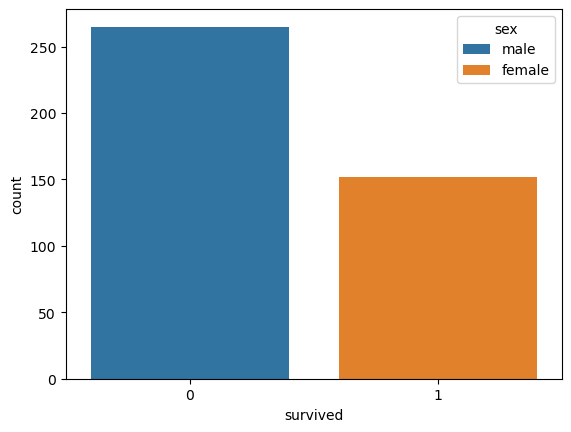

In [35]:
# see the histogram survived according to the gender
sns.countplot(x='survived', hue='sex', data=df)

In [ ]:
# are there any survived men? NO
df[df["survived"] == 1]["sex"].value_counts()

sex
female    152
Name: count, dtype: int64

**Important Explaination**
----------------
**I am planning to drop the gender (sex) column** because;
* including it may cause the model to rely too much on gender signals, especially if strong patterns don’t generalize. 
* removing gender pushes the model to learn from non-gender factors and **reduces bias**.

In [38]:
# drop sex column
df.drop("sex", axis=1, inplace=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked
0,0,3,34.5,0,0,7.8292,Q
1,1,3,47.0,1,0,7.0000,S
2,0,2,62.0,0,0,9.6875,Q
3,0,3,27.0,0,0,8.6625,S
4,1,3,22.0,1,1,12.2875,S


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  417 non-null    int64  
 1   pclass    417 non-null    int64  
 2   age       417 non-null    float64
 3   sibsp     417 non-null    int64  
 4   parch     417 non-null    int64  
 5   fare      417 non-null    float64
 6   embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 26.1+ KB


In [41]:
# convert embarked object to numeric
df["embarked"].value_counts()

embarked
S    269
C    102
Q     46
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

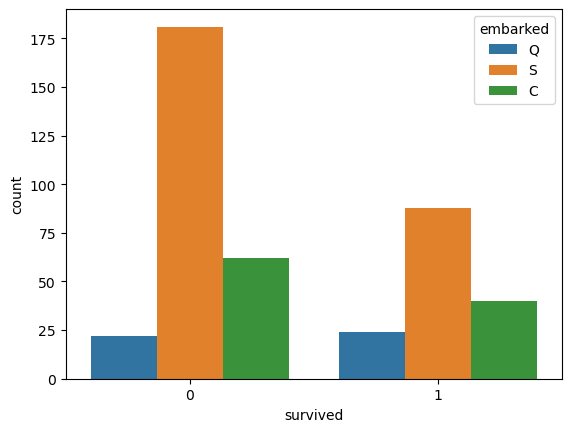

In [42]:
# see the relation survived with embarked
sns.countplot(x='survived', hue='embarked', data=df)

In [43]:
# lablel encoding with pandas map function
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked
0,0,3,34.5,0,0,7.8292,2
1,1,3,47.0,1,0,7.0000,0
2,0,2,62.0,0,0,9.6875,2
3,0,3,27.0,0,0,8.6625,0
4,1,3,22.0,1,1,12.2875,0


In [ ]:
# alternative with LabelEncoder from scikit learn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["embarked"] = label_encoder.fit_transform(df["embarked"])
df.head()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  417 non-null    int64  
 1   pclass    417 non-null    int64  
 2   age       417 non-null    float64
 3   sibsp     417 non-null    int64  
 4   parch     417 non-null    int64  
 5   fare      417 non-null    float64
 6   embarked  417 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


**TIME FOR EDA - EXPLORE RELATIONS**
----------------


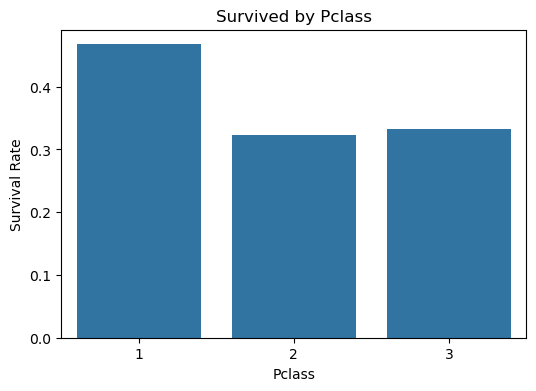

In [48]:
# survival rate by pclass
plt.figure(figsize=(6,4))
sns.barplot(x='pclass', y='survived', data=df, errorbar=None)
plt.title('Survived by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

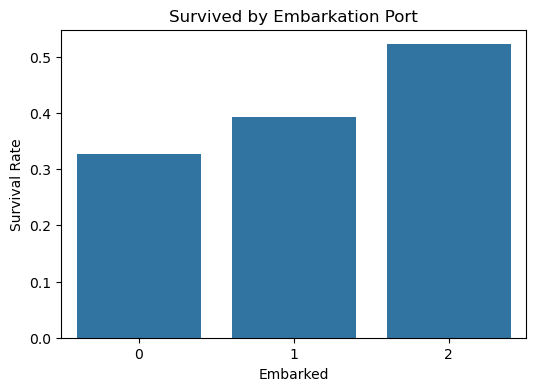

In [49]:
# survival rate by embarked
plt.figure(figsize=(6,4))
sns.barplot(x='embarked', y='survived', data=df, errorbar=None)
plt.title('Survived by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

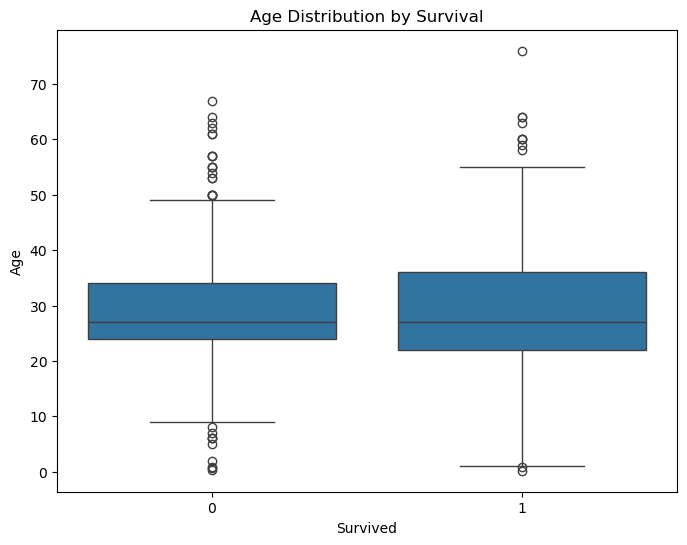

In [50]:
# survival rate by age
plt.figure(figsize=(8,6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

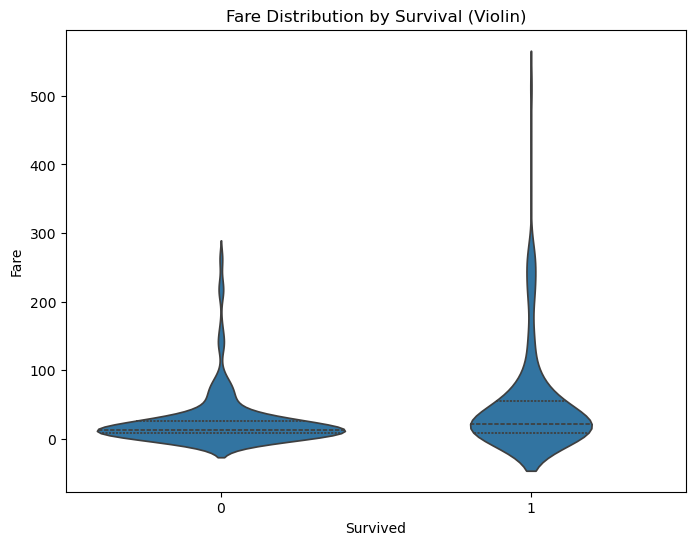

In [51]:
# survival rate by fare
plt.figure(figsize=(8,6))
sns.violinplot(x='survived', y='fare', data=df, inner='quartile')
plt.title('Fare Distribution by Survival (Violin)')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

**Short explaintion:** The violin plot shows **higher fare values more often in Survived = 1 group**. This hints at an association between higher fares and survival, but it’s not proof of causation—further analysis is needed.

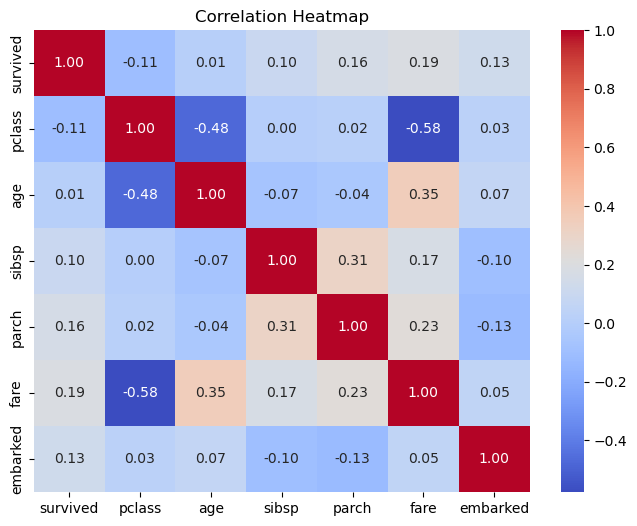

In [53]:
# see the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**MODEL CREATION WITH GRADIENT BOOSTING**
--------

In [ ]:
from sklearn.model_selection import train_test_split

# split the data
X = df.drop("survived", axis=1)
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((333, 6), (84, 6), (333,), (84,))

In [55]:
# import gradient boosting classifier and create a model
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

In [56]:
# train the model
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [57]:
#predict the model
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [58]:
# see the metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.6309523809523809
Confusion Matrix:
 [[42  8]
 [23 11]]


In [61]:
# scale the X Features and train and predict again and see NOTHING CHANGES
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6309523809523809
Confusion Matrix:
 [[42  8]
 [23 11]]


In [62]:
# try toi increase the accurasy with trying hyperparameters tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.6694708276797828
Accuracy: 0.6190476190476191
Confusion Matrix:
 [[45  5]
 [27  7]]


In [64]:
# read data with pandas
df_all = pd.read_csv('2_8_titanic_dataset.csv')
df_all.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [67]:
# all columns lowercase
df_all.columns = df_all.columns.str.lower()
df_all.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [68]:
# drop columns excep gender
columns_to_drop = ['passengerid', 'name', 'ticket', 'cabin']
df_all = df_all.drop(columns_to_drop, axis=1)
df_all.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [69]:
# convert sex and embarked to numeric
df_all['sex'] = df_all['sex'].map({'male': 0, 'female': 1})
df_all['embarked'] = df_all['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_all.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


In [71]:
df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  418 non-null    int64  
 1   pclass    418 non-null    int64  
 2   sex       418 non-null    int64  
 3   age       332 non-null    float64
 4   sibsp     418 non-null    int64  
 5   parch     418 non-null    int64  
 6   fare      417 non-null    float64
 7   embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [72]:
# age with median
df_all['age'].fillna(df_all['age'].median(), inplace=True)
df_all.isnull().sum()

C:\Users\guray.arik\AppData\Local\Temp\ipykernel_77160\839796775.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all['age'].fillna(df_all['age'].median(), inplace=True)


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

In [73]:
# drop fare row with null
df_all.dropna(inplace=True)
df_all.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [76]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  417 non-null    int64  
 1   pclass    417 non-null    int64  
 2   sex       417 non-null    int64  
 3   age       417 non-null    float64
 4   sibsp     417 non-null    int64  
 5   parch     417 non-null    int64  
 6   fare      417 non-null    float64
 7   embarked  417 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.3 KB


In [77]:
# split data df_all
X = df_all.drop('survived', axis=1)
y = df_all['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((333, 7), (84, 7), (333,), (84,))

In [78]:
# creat emodel and fit
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [79]:
# predict
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
# see the metrics with gender IT WILL BE 100%
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]


## Gradient Boosting Regression


**Gradient Boosting Regression vs Classification**
* Gradient Boosting Regression is used to predict continuous values
* Gradient Boosting Classification is used to predict categorical values

* While **classification uses log of odds**, **regression simply uses residuals (errors)** for each data point, aiming to minimize the mean squared error in each step. 

* The main difference lies in the loss function used.


<img src="https://datamapu.com/images/gradient_boosting/gradient_boosting_algorithm_reg.png" style="width:1000px; height:700px"/>

**Gradient Boosting Regression Example**
-----------

In [82]:
# import data Ankara house Prices
df = pd.read_csv('2_8_ankara_house_prices_cleaned_dataset_gradient_boosting.csv')
df.head()

,Unnamed: 0,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
0,0,4,3.0,130.0,Akyurt,3450000,0
1,1,5,2.0,175.0,Akyurt,3975000,0
2,2,1,1.0,550.0,Akyurt,3600000,1
3,3,5,4.0,170.0,Akyurt,3705000,7
4,4,4,1.0,110.0,Akyurt,2099999,7


In [83]:
# Clean Dataset
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
0,4,3.0,130.0,Akyurt,3450000,0
1,5,2.0,175.0,Akyurt,3975000,0
2,1,1.0,550.0,Akyurt,3600000,1
3,5,4.0,170.0,Akyurt,3705000,7
4,4,1.0,110.0,Akyurt,2099999,7


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RoomCount    10244 non-null  int64  
 1   Floor        10244 non-null  float64
 2   Size(m2)     10244 non-null  float64
 3   District     10244 non-null  object 
 4   Price(TL)    10244 non-null  int64  
 5   Age_labeled  10244 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 480.3+ KB


In [85]:
# see District catgeory column
df['District'].value_counts()

District
Mamak              1404
Keçiören           1400
Sincan             1312
Etimesgut          1311
Çankaya            1149
Pursaklar           942
Altındağ            937
Yenimahalle         874
Polatlı             414
Gölbaşı             372
Çubuk                56
Akyurt               31
Elmadağ              16
Kahramankazan        14
Beypazarı             4
Bala                  3
Ayaş                  1
Güdül                 1
Kızılcahamam          1
Nallıhan              1
Şereflikoçhisar       1
Name: count, dtype: int64

In [86]:
# Lablel Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['District'] = le.fit_transform(df['District'])
df.head()

,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
0,4,3.0,130.0,0,3450000,0
1,5,2.0,175.0,0,3975000,0
2,1,1.0,550.0,0,3600000,1
3,5,4.0,170.0,0,3705000,7
4,4,1.0,110.0,0,2099999,7


In [87]:
df["District"].value_counts()

District
12    1404
10    1400
16    1312
6     1311
18    1149
15     942
1      937
17     874
14     414
7      372
19      56
0       31
5       16
9       14
4        4
3        3
2        1
8        1
11       1
13       1
20       1
Name: count, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RoomCount    10244 non-null  int64  
 1   Floor        10244 non-null  float64
 2   Size(m2)     10244 non-null  float64
 3   District     10244 non-null  int64  
 4   Price(TL)    10244 non-null  int64  
 5   Age_labeled  10244 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 480.3 KB


In [90]:
df.isnull().sum()

RoomCount      0
Floor          0
Size(m2)       0
District       0
Price(TL)      0
Age_labeled    0
dtype: int64

In [92]:
# Understand Relationship between features
df.corr()

,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
RoomCount,1.000000,0.216179,0.782412,0.039690,0.406485,0.019355
Floor,0.216179,1.000000,0.293709,0.053235,0.456109,-0.001696
Size(m2),0.782412,0.293709,1.000000,0.039825,0.502650,0.024371
District,0.039690,0.053235,0.039825,1.000000,0.159885,-0.004091
Price(TL),0.406485,0.456109,0.502650,0.159885,1.000000,-0.110119
Age_labeled,0.019355,-0.001696,0.024371,-0.004091,-0.110119,1.000000


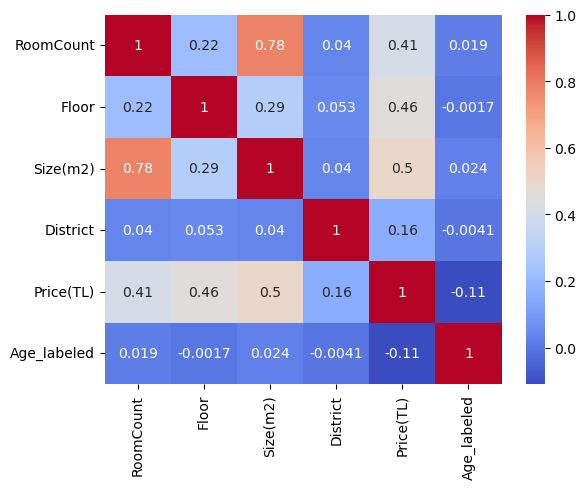

In [94]:
# see in heatmap
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [95]:
# Split Data
from sklearn.model_selection import train_test_split

X = df.drop("Price(TL)", axis=1)
y = df["Price(TL)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8195, 5), (2049, 5), (8195,), (2049,))

In [96]:
# Scale data, I will also compare with linear regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((8195, 5), (2049, 5))

In [97]:
# Create first Linear Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 2601443095251.187
R2 Score: 0.34709141877138316


In [ ]:
# Create Gradient Boosting Regressor Model, SEE THE HOW SUCCESSFUL IT IS!
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 1333760344088.8235
R2 Score: 0.6652536526562225


In [99]:
# Use Pipeline -RECAP THE PIPELINE
from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor())
])

pipeline1.fit(X_train, y_train)

y_pred = pipeline1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 1333630282099.752
R2 Score: 0.665286295533905


In [101]:
# try in a for loop and compare with all Regressor model learned so far 
# #Linear Regression, KNNRegressor, SVR, DesicionTree Rgressor, Random forrest Regressor,Adaboost, Gradient Boosting Regressor


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score

models = [
    LinearRegression(),
    KNeighborsRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

# see all the result in a dataframe
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((model.__class__.__name__, mse, r2))

df_results = pd.DataFrame(results, columns=["Model", "MSE", "R2"])
df_results


,Model,MSE,R2
0,LinearRegression,2.601443e+12,0.347091
1,KNeighborsRegressor,1.607625e+12,0.596519
2,SVR,4.282633e+12,-0.074853
3,DecisionTreeRegressor,1.927524e+12,0.516231
4,RandomForestRegressor,1.253419e+12,0.685418
5,AdaBoostRegressor,2.092261e+12,0.474886
6,GradientBoostingRegressor,1.334425e+12,0.665087


In [102]:
# Hyper parameter tuning with Gradient Boosting and RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingRegressor()
random_search = RandomizedSearchCV(gb_model, param_distributions=params, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

y_pred = random_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
MSE: 1234631144361.0752
R2 Score: 0.6901330379753632
